
$$ 
\frac{dX}{dt} = \sigma (Y - X)
$$
$$
\frac{dY}{dt} = X (\rho - Z) - Y
$$
$$
\frac{dZ}{dt} = X Y - \beta Z
$$


1. $\sigma=10$, $\rho=28$, and $\beta=8/3$ <br>
2. The timepoints at which we would like to know the values of $X$, $Y$, and $Z$. Here, I let them 100,000 timepoints evenly spaced from 0 to 100. <br>
3. The initial condition, which is the system state at the initial timepoint. Here, it is a set of $X_{t=0} = 0.1, Y_{t=0}=0.0$, and $Z_{t=0}=0.0$.


In [1]:
# Define the lorenz system
# X, Y, and Z make up the system state, t is time
# sigma, rho, beta are the system parameters
def lorenz_system(state, t, sigma, rho, beta):
    
    # system state depends on three variables: x, y, z
    X, Y, Z = state
    
    # define the three ODEs describing the rates of change of the above three variables
    dX_dt = sigma * (Y - X)
    dY_dt = X * (rho - Z) - Y
    dZ_dt = X * Y - beta * Z
    
    # return a list of the ODEs
    return [dX_dt, dY_dt, dZ_dt]

# Define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# Define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100

import numpy as np
time_points = np.linspace(start_time, end_time, end_time*1000)

# Define the initial system state - a list of X, Y, Z values at the initial time point, respectively
initial_state = [2., 4., 5.5]
# initial_state = [0.1, 0., 0.0]

# Solve the ODE system with `odeint`
from scipy.integrate import odeint

# by supplying the `odeint` with 
# 1, the function describing the system of ODEs
# 2, list of initial system conditions
# 3, sequence of time points to solve for
# 4, tuple of system parameters
# the result is an array of X, Y, and Y value arrays for each time point, with the initial values in the first row
XYZ = odeint(lorenz_system, initial_state, time_points, args=(sigma, rho, beta))

# individual arrays of X, Y, and Z values
X = XYZ[:, 0]
Y = XYZ[:, 1]
Z = XYZ[:, 2]

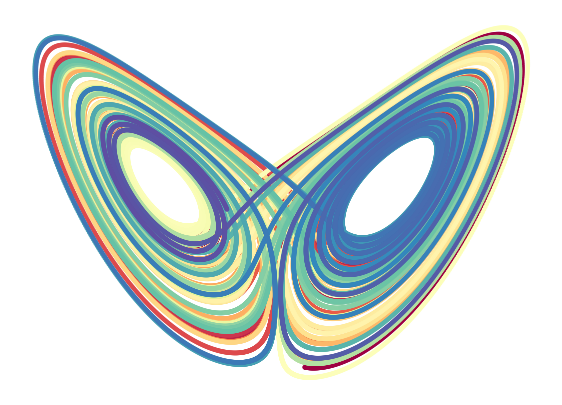

In [2]:
#| label: butterfly2d
#| fig-cap: "... Well, it's already here."

# Packages for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles, fonts, legends, and math text
sns.set_style("white")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 18}
plt.rc('font', **font)
legnd = {'fontsize': 11, 'handlelength': 1.5}
plt.rc('legend', **legnd)

# Plotting the butterfly - a "phase plot" of X values against Z values
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(X, Z, c=time_points, cmap="Spectral", s=5)

ignored = plt.axis("off")
# fig.savefig("lorenz_butterfly.png", transparent=True)

In [3]:
#| label: butterfly3d
#| fig-align: center

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"
# import plotly.offline as pyo
# pyo.init_notebook_mode()

# reduce the number of points - computational burden, also to make the point moves faster
tps = np.linspace(0, 50, 50*100)
XYZp = odeint(lorenz_system, initial_state, tps, args=(sigma, rho, beta))
Xp = XYZp[:, 0]
Yp = XYZp[:, 1]
Zp = XYZp[:, 2]

# fig = px.scatter_3d(x=X, y=Y, z=Z, 
#                     color=time_points, color_continuous_scale='Spectral')
# fig.update_traces(marker=dict(size=0.8, line_width=3.0))

fig = go.Figure(data=go.Scatter3d(x=Xp, y=Yp, z=Zp, mode="lines",
                                  line=dict(width=4., color=tps, 
                                            colorscale='Spectral', showscale=True, 
                                            colorbar=dict(lenmode='fraction', len=0.5, title="Time"))))

fig.update_layout(template="plotly_white", 
                  scene_camera=dict(eye=dict(x = -1., y = 1., z = 0.25)), 
                  scene_aspectratio=dict(x=0.6, y=0.6, z=0.65),
                  margin=dict(l=0, r=0, t=0, b=0), 
                  width=510, height=420)
fig.update_coloraxes(colorbar=dict(lenmode='fraction', len=0.5, title="Time"))
# fig.update_yaxes(automargin=True)

# add the initial state
fig.add_trace(go.Scatter3d(x=[initial_state[0]], y=[initial_state[1]], z=[initial_state[2]], 
                           marker=dict(color='black', size=5.), 
                           mode="markers", hovertext="Initial condition", showlegend=False))

# fig.write_html("butterfly3d.html", full_html=False)

fig.show()

In [4]:
#| label: animation
#| fig-align: center

fig = go.Figure(
    data= [go.Scatter3d(x=Xp, y=Yp, z=Zp,
                     mode="lines",
                     line=dict(width=4., color=tps, 
                               colorscale='Spectral', showscale=True, 
                               colorbar=dict(lenmode='fraction', len=0.5, title="Time"))),
           go.Scatter3d(x=Xp, y=Yp, z=Zp,
                     mode="lines",
                     line=dict(width=4., color=tps, 
                               colorscale='Spectral', showscale=True, 
                               colorbar=dict(lenmode='fraction', len=0.5, title="Time")))
          ],
    frames=[go.Frame(
        data=[
              go.Scatter3d(x=[Xp[i]], y=[Yp[i]], z=[Zp[i]], marker=dict(color='black', size=4.), 
                           mode="markers")
             ])
            for i in np.round(np.linspace(0, 1000-1, 200)).astype(int)]
)

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration},
            }

eps = 5
fig.update_layout(
    template="plotly_white", width=520, height=500, 
    margin=dict(l=0.5, r=0.5, t=0.5, b=0.5),
    showlegend=False,
    # scene = dict(xaxis=dict(range=[min(X)-eps, max(X)+eps], autorange=False, zeroline=False),
    #             yaxis=dict(range=[min(Y)-eps, max(Y)+eps], autorange=False, zeroline=False),
    #             zaxis=dict(range=[min(Z)-eps, max(Z)+eps], autorange=False, zeroline=False)),
    scene_camera=dict(eye=dict(x = 1.2, y = -1.2, z = 0.1)),
    scene_aspectratio=dict(x=0.8, y=0.8, z=0.8),
    updatemenus = [{"buttons":[{
                        "args": [None, frame_args(50.)],
                        "label": "Play", 
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "Pause", 
                        "method": "animate",
                  }],
                    
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.3,
                "y": 0.1,
            }
         ]
)

# fig.update_geos(resolution=110)
# fig.write_html("animation.html", full_html=False)
# fig.write_image("test.png", format="png", scale=2)
fig.show()

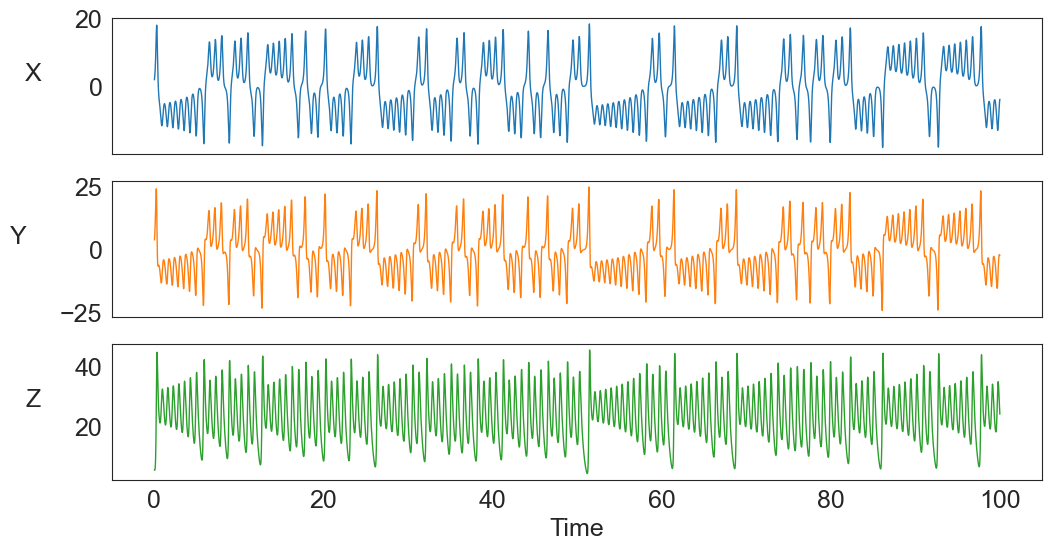

In [5]:
#| label: xyz
#| fig-align: center

fig, ax = plt.subplots(figsize=(12, 6), nrows=3, ncols=1, sharex=True)

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['X', 'Y', 'Z']
for i in range(3):
    ax[i].plot(time_points, XYZ[:, i], lw=1, c=colors[i])
    ax[i].set_ylabel(labels[i], rotation=0, labelpad=30)

ignored = ax[2].set_xlabel("Time")

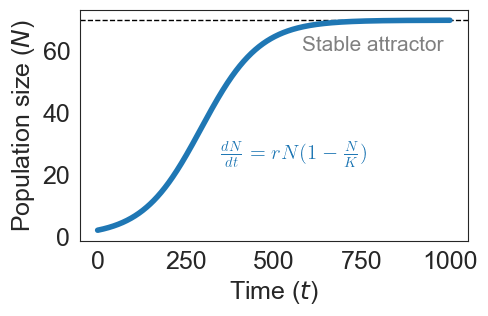

In [9]:
#| label: logistic-growth
#| fig-align: center

def logistic_growth(N, t, r, K):
    dN_dt = r*N*(1 - N/K)
    return dN_dt

N0 = 2
ts = np.linspace(0, 200, 1000)
r = 0.06
K = 70
pop = odeint(logistic_growth, N0, ts, args=(r, K)).flatten()

fig, ax = plt.subplots(figsize=(5,3))

plt.axhline(y=K, color='black', ls='--', lw=1) # carrying capacity
plt.text(x=580, y=60, s="Stable attractor", color='grey', fontsize=15)

ax.plot(pop, lw=4)

plt.rcParams['text.usetex'] = True

ax.set(xlabel=r"Time ($t$)", ylabel=r"Population size ($N$)")
equation = plt.text(x=350, y=25, s=r'$\frac{dN} {dt} = rN( 1 - \frac{N}{K})$', fontsize=15, fontweight='bold', color='tab:blue')

plt.rcParams['text.usetex'] = False

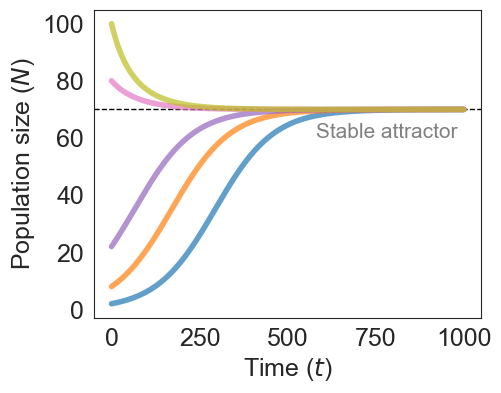

In [17]:
#| label: stable-attractor
#| fig-align: center
fig, ax = plt.subplots(figsize=(5,4))

plt.axhline(y=K, color='black', ls='--', lw=1) # carrying capacity
plt.text(x=580, y=60, s="Stable attractor", color='grey', fontsize=15)

N0_list = [2, 8, 22, 80, 100]
line_colors = ['tab:blue', 'tab:orange', 'tab:purple', 'tab:pink', 'tab:olive']

for i in range(len(N0_list)):

    pop = odeint(logistic_growth, N0_list[i], ts, args=(r, K)).flatten()
    ax.plot(pop, lw=4, color=line_colors[i], alpha=0.7)

plt.rcParams['text.usetex'] = True

ax.set(xlabel=r"Time ($t$)", ylabel=r"Population size ($N$)")

plt.rcParams['text.usetex'] = False

In [7]:
# add an eps=10^{-10} to initial X 
epsilon = 10**(-15)
initial_state_new = [2. + epsilon, 4., 5.5]
# initial_state = [0.1, 0., 0.0]

# Solve the ODE system with `odeint`
from scipy.integrate import odeint
XYZ_new = odeint(lorenz_system, initial_state_new, time_points, args=(sigma, rho, beta))

# extract the individual arrays of X, Y, and Z values
X_new = XYZ_new[:, 0]
Y_new = XYZ_new[:, 1]
Z_new = XYZ_new[:, 2]

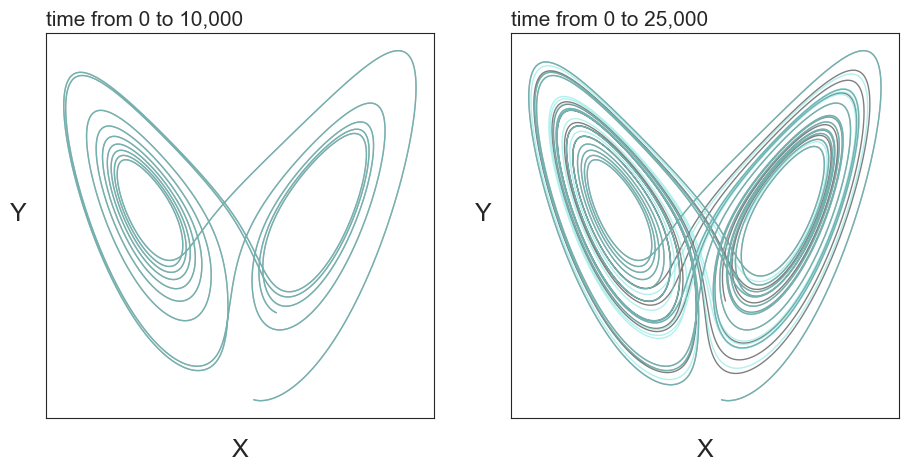

In [8]:
#| label: epsilon
#| fig-align: center

fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

endpoints = [10000, 25000]

for i in range(2):
    te = endpoints[i]
    ax[i].plot(X[:te], Z[:te], c='#000000', lw=1, alpha=0.5)
    ax[i].plot(X_new[:te], Z_new[:te], c='#66e3df', lw=1, alpha=0.5)

    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].axes.get_yaxis().set_ticks([])
    ax[i].set_xlabel("X", labelpad=15)
    ax[i].set_ylabel("Y", rotation=0, labelpad=20)

ax[0].set_title("time from 0 to 10,000", fontsize=15, loc="left")
ax[1].set_title("time from 0 to 25,000", fontsize=15, loc="left")
plt.show()